In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

import fuzzymatcher
import re

bank_df = pd.read_csv('bank_df.csv')
cash_book = pd.read_csv('nav_cash_book.csv')

bank_df


,Unnamed: 0,index_bank,date,transaction_details_1,transaction_details_2,amount,trx_type,trans_type,trx_detail,period,ft_no,tt_no,aaa_no,md_no,charge_id,batch_no,inhouse_cheque_no,cheque_no,bulk_trans_id,is_charge
0,0,0,2023-11-01,Standing Order FT233054RNZQ,POLICY PREMIUM 029/VES/155738 EUNICE KAMBA MBU...,2206.00,credit,Standing Order,Standing Order FT233054RNZQ POLICY PREMIUM 029...,2023Q4,FT233054RNZQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,1,1,2023-11-01,Standing Order FT23305LCPC5,093715/093716/143362/171223 MARTIN KIMANI KANG...,8020.00,credit,Standing Order,Standing Order FT23305LCPC5 093715/093716/1433...,2023Q4,FT23305LCPC5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,2,2,2023-11-01,Standing Order FT23305RQKBY,JK Policy no. 027/EAW/232465 JANE JEMATIA KIPL...,64000.00,credit,Standing Order,Standing Order FT23305RQKBY JK Policy no. 027/...,2023Q4,FT23305RQKBY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,3,3,2023-11-01,Standing Order FT23305K8ZVX,025/NCBAEDU/267594 PURITY GAKII,10025.00,credit,Standing Order,Standing Order FT23305K8ZVX 025/NCBAEDU/267594...,2023Q4,FT23305K8ZVX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,4,4,2023-11-01,Standing Order FT2330502XLT,POLICY NO: 029/EAW/208751 INVESTMENT POLICY MA...,2005.00,credit,Standing Order,Standing Order FT2330502XLT POLICY NO: 029/EAW...,2023Q4,FT2330502XLT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3167,3167,3167,2023-11-30,Local Cheque Deposit,CHQ-000336 REBECCA FT233343SV7C,14117.00,credit,Local Cheque Deposit,Local Cheque Deposit CHQ-000336 REBECCA FT2333...,2023Q4,FT233343SV7C,NaN,NaN,NaN,NaN,NaN,NaN,336.0,NaN,False
3168,3168,3168,2023-11-30,Local Cheque Deposit,CHQ-000645 PRESTIGE FT23334T4VS8,10000.00,credit,Local Cheque Deposit,Local Cheque Deposit CHQ-000645 PRESTIGE FT233...,2023Q4,FT23334T4VS8,NaN,NaN,NaN,NaN,NaN,NaN,645.0,NaN,False
3169,3169,3169,2023-11-30,KE Excise Duty,Tax AAACT233349LBG3TZD,-204.00,debit,KE Excise Duty,KE Excise Duty Tax AAACT233349LBG3TZD,2023Q4,NaN,NaN,AAACT233349LBG3TZD,NaN,NaN,NaN,NaN,NaN,NaN,True
3170,3170,3170,2023-11-30,Ledger Fee,Ledger Fees AAACT233349LBG3TZD,-1020.00,debit,Ledger Fee,Ledger Fee Ledger Fees AAACT233349LBG3TZD,2023Q4,NaN,NaN,AAACT233349LBG3TZD,NaN,NaN,NaN,NaN,NaN,NaN,True


## FILTER OUT CHARGES FROM BANK

In [2]:
bank_df_ncba = bank_df[bank_df['is_charge'] == False]
bank_df_ncba 
bank_df_ncba.columns


Index(['Unnamed: 0', 'index_bank', 'date', 'transaction_details_1',
       'transaction_details_2', 'amount', 'trx_type', 'trans_type',
       'trx_detail', 'period', 'ft_no', 'tt_no', 'aaa_no', 'md_no',
       'charge_id', 'batch_no', 'inhouse_cheque_no', 'cheque_no',
       'bulk_trans_id', 'is_charge'],
      dtype='object')

In [3]:
cash_book = cash_book.drop_duplicates()

#cash_book.set_index('index_cashbook', inplace=True)
#bank_df_ncba.set_index('index_bank', inplace=True)
cash_book = cash_book.rename(columns={'Unnamed: 0': 'index_cashbook'})
cash_book
#bank_df_ncba

,index_cashbook,posting_date,document_type,document_no,bank_account_no,description,amount,amount_lcy,open,kba_bank_code,...,entry_no,reversal_reason,description_2,subsystem_doctype,navpayingbankcategory,um_username,busledger_type_code,policy_no,ilmsreqbatchno,outstanding
0,0,2023-11-01,NaN,FPV-INS2023005697,2-740-02-002,KDN530F DENIS ODOYO,-1500000.00,-1500000.00,True,68.0,...,28533671,NaN,NaN,NaN,NaN,NaN,INSURED,NaN,FPV-INS2023005697,False
1,1,2023-11-01,NaN,2023020025786,2-740-02-002,NIC HEAD OFFICE,-45000.00,-45000.00,True,NaN,...,28533673,NaN,NaN,PAY,USSDPOLICYLOAN,USSDPOLICYLOANUSER,INSURED,027/AEN/107082,20230200013446,False
2,2,2023-11-01,NaN,2023020025493,2-740-02-002,NIC HEAD OFFICE,-59182.20,-59182.20,True,11.0,...,28533687,NaN,NaN,PAY,NaN,SNZIOKA,INSURED,028/AEN/178027,20230200013290,False
3,3,2023-11-01,NaN,2023020025294,2-740-02-002,NIC HEAD OFFICE,-817909.94,-817909.94,True,3.0,...,28533690,NaN,NaN,PAY,NaN,SNZIOKA,INSURED,028/EAW/073607,20230200013244,False
4,4,2023-11-01,NaN,2023020025720,2-740-02-002,NIC HEAD OFFICE,-730680.88,-730680.88,True,1.0,...,28533692,NaN,NaN,PAY,NaN,SNZIOKA,INSURED,022/CEA/078232,20230200013413,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20882,20882,2023-11-30,NaN,FR-INS2023001512,2-740-02-002,DA AMOUNTS IN AC 19 ( FT233331T30Y ETC),4040520.71,4040520.71,True,NaN,...,29292347,NaN,NaN,NaN,NaN,NaN,INSURED,NaN,NaN,False
20883,20883,2023-11-30,NaN,FR-INS2023001513,2-740-02-002,NOVEMBER INTERFUND TRANSFER,118000.00,118000.00,True,NaN,...,29292349,NaN,NaN,NaN,NaN,NaN,INSURED,NaN,NaN,False
20884,20884,2023-11-30,NaN,FR-INS2023001515,2-740-02-002,NOVEMBER INTERFUND TRANSFER,8518859.20,8518859.20,True,NaN,...,29292375,NaN,NaN,NaN,NaN,NaN,INSURED,NaN,NaN,False
20885,20885,2023-11-30,NaN,FPV-INS2023006211,2-740-02-002,Nov 2023 sacco deductions,-4900964.00,-4900964.00,True,11.0,...,29292376,NaN,NaN,NaN,NaN,NaN,INSURED,NaN,FPV-INS2023006211,False


In [4]:

# List of potential transaction ID columns
transaction_id_cols = ['ft_no', 'tt_no', 'aaa_no', 'md_no', 'charge_id', 'batch_no', 'cheque_no']

# Store matched results
matches = []

# Iterate over each potential transaction ID column
for col in transaction_id_cols:
    # Create a new column 'transaction_id' in bank DataFrame using the current column
    bank_df_ncba = bank_df_ncba.copy()  # Create a copy of the DataFrame to avoid modifying a view
    bank_df_ncba.loc[:, 'transaction_id'] = bank_df_ncba[col]
    
    # Perform fuzzy matching using fuzzymatcher
    matched_results = fuzzymatcher.fuzzy_left_join(
        bank_df_ncba,
        cash_book,
        left_on=["date", "amount", "transaction_id"],
        right_on=["posting_date", "amount", "eft_file_name"],
        left_id_col="index_bank",
        right_id_col="index_cashbook"
    )
    
    # Store the results with the column name used
    if not matched_results.empty:
        matched_results.loc[:, 'matched_using'] = col  # Create 'matched_using' column
        matches.append(matched_results)

# Combine all the matches found
all_matches = pd.concat(matches, ignore_index=True)

# Display the combined matches
all_matches


,best_match_score,__id_left,__id_right,Unnamed: 0,index_bank,date,transaction_details_1,transaction_details_2,amount_left,trx_type,...,reversal_reason,description_2,subsystem_doctype,navpayingbankcategory,um_username,busledger_type_code,policy_no,ilmsreqbatchno,outstanding,matched_using
0,0.492109,0,159,0,0,2023-11-01,Standing Order FT233054RNZQ,POLICY PREMIUM 029/VES/155738 EUNICE KAMBA MBU...,2206.00,credit,...,NaN,NaN,REC,NaN,SYSTEM,INSURED,029/VES/155738,NaN,False,ft_no
1,0.185814,1,151,1,1,2023-11-01,Standing Order FT23305LCPC5,093715/093716/143362/171223 MARTIN KIMANI KANG...,8020.00,credit,...,NaN,NaN,REC,NaN,SYSTEM,INSURED,036/EAW/093715,NaN,False,ft_no
2,0.513337,2,150,2,2,2023-11-01,Standing Order FT23305RQKBY,JK Policy no. 027/EAW/232465 JANE JEMATIA KIPL...,64000.00,credit,...,NaN,NaN,REC,NaN,SYSTEM,INSURED,027/EAW/232465,NaN,False,ft_no
3,0.586526,3,162,3,3,2023-11-01,Standing Order FT23305K8ZVX,025/NCBAEDU/267594 PURITY GAKII,10025.00,credit,...,NaN,NaN,REC,NaN,SYSTEM,INSURED,025/NCBAEDU/267594,NaN,False,ft_no
4,0.426481,4,160,4,4,2023-11-01,Standing Order FT2330502XLT,POLICY NO: 029/EAW/208751 INVESTMENT POLICY MA...,2005.00,credit,...,NaN,NaN,REC,NaN,SYSTEM,INSURED,029/EAW/208751,NaN,False,ft_no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16522,0.088291,3165,20876,3165,3165,2023-11-30,Internal Transfer FT23334XKMS5,DIRECT DEBIT POLICY 027/EAW/264613 JENNIFER KA...,16529.00,credit,...,NaN,NaN,NaN,NaN,NaN,INSURED,NaN,NaN,False,cheque_no
16523,-0.059318,3166,17929,3166,3166,2023-11-30,Local Cheque Deposit,CHQ-000548 ROY FT233342CX8X,35000.00,credit,...,NaN,NaN,PAY,USSDPOLICYLOAN,USSDPOLICYLOANUSER,INSURED,031/AEN/139215,20230200014673,False,cheque_no
16524,-0.155601,3167,17954,3167,3167,2023-11-30,Local Cheque Deposit,CHQ-000336 REBECCA FT233343SV7C,14117.00,credit,...,NaN,NaN,PAY,NaN,SNZIOKA,INSURED,025/GLS/0013006/Y2023,20230200014638,False,cheque_no
16525,-0.077183,3168,19620,3168,3168,2023-11-30,Local Cheque Deposit,CHQ-000645 PRESTIGE FT23334T4VS8,10000.00,credit,...,NaN,NaN,REC,NaN,SMUKUI,INSURED,025/AEN/121401,NaN,False,cheque_no


In [5]:
cols = ['best_match_score','index_bank','index_cashbook','transaction_id','eft_file_name','amount_left', 'amount_right','date','posting_date']
# Sort by best_match_score in descending order
matched_results_sorted = all_matches.sort_values(by='best_match_score', ascending=False)

all_matches[cols].sort_values(by='best_match_score', ascending=False)

# Drop duplicates to keep only the best match for each id_backend and id_fsp
unique_matched_results = matched_results_sorted.drop_duplicates(subset=['index_bank', 'amount_left'], keep='first')
unique_matched_results[cols]
#all_matches[cols]

,best_match_score,index_bank,index_cashbook,transaction_id,eft_file_name,amount_left,amount_right,date,posting_date
471,0.797847,616,8410,FT23311GYQN0,FT23311GYQN0,50731164.35,50731164.35,2023-11-07,2023-11-07
2273,0.794145,3049,20882,FT23333FLGN5,FT23333FLGN5,4040520.71,4040520.71,2023-11-30,2023-11-30
1809,0.717381,2490,14905,FT23331XZK1M,FT23331XZK1M,16736.00,16736.00,2023-11-27,2023-11-27
1871,0.717381,2567,14892,FT23331Q25LJ,FT23331Q25LJ,10683.00,10683.00,2023-11-27,2023-11-27
994,0.715701,1397,10456,FT23318KZQPV,FT23318KZQPV,12182500.00,12182500.00,2023-11-14,2023-11-14
...,...,...,...,...,...,...,...,...,...
13990,-0.180012,2958,17476,DDI154124281123,DDI135756291123,-1204685.77,-50000.00,2023-11-29,2023-11-29
13616,-0.180186,2492,14882,NaN,NaN,22366.25,-1578221.07,2023-11-27,2023-11-27
12202,-0.180780,493,8017,NaN,NaN,229542.72,134751.80,2023-11-06,2023-11-06
13661,-0.204864,2545,14724,DDI122243241123,DDI153755271123,-5154106.99,-75000.00,2023-11-27,2023-11-27


import pandas as pd
import fuzzymatcher

# Assuming 'bank' and 'cashbook' DataFrames are already loaded

# List of potential transaction ID columns
transaction_id_cols = ['ft_no', 'tt_no', 'aaa_no', 'md_no', 'charge_id', 'batch_no', 'cheque_no']

# Store matched results
matches = []

# Iterate over each potential transaction ID column
for col in transaction_id_cols:
    # Create a new column 'transaction_id' in bank DataFrame using the current column
    bank_df_ncba['transaction_id'] = bank_df_ncba[col]
    
    # Perform fuzzy matching using fuzzymatcher
    matched_results = fuzzymatcher.fuzzy_left_join(
        bank_df_ncba,
        cash_book,
        left_on=["date", "amount", "transaction_id"],
        right_on=["posting_date", "amount", "eft_file_name"],
        left_id_col="index_bank",
        right_id_col="index_cashbook"
    )
    
    # Store the results with the column name used
    if not matched_results.empty:
        matched_results['matched_using'] = col
        matches.append(matched_results)

# Combine all the matches found
all_matches = pd.concat(matches, ignore_index=True)

# Display the combined matches
all_matches


# Create the new column 'trx_id' by combining the values from the specified columns
bank_df_ncba.loc[:, 'trx_id'] = bank_df_ncba[['ft_no', 'tt_no', 'aaa_no', 'md_no', 'cheque_no', 'batch_no']].bfill(axis=1).iloc[:, 0]

bank_df_ncba


trx_id

ft_no = 2172
tt_no = 121
aaa_no = 62
md_no = 6
batch_no = 185
check_no = 586
bulk_trans_id = 165




TOTAL = 2361

# FUZZY MATCHING


m
left_on=["date", "amount", "trx_id"]
right_on=["posting_date", "amount", "eft_file_name"]
matched_results = fuzzymatcher.fuzzy_left_join(bank_df_ncba, cash_book, left_on = left_on, right_on = right_on, left_id_col="index_bank", right_id_col="index_cashbook")

       


matched_results

cols = ['best_match_score','index_bank','index_cashbook','trx_id','eft_file_name','amount_left', 'amount_right','date','posting_date']
# Sort by best_match_score in descending order
matched_results_sorted = matched_results.sort_values(by='best_match_score', ascending=False)

matched_results[cols].sort_values(by='best_match_score', ascending=False)

# Drop duplicates to keep only the best match for each id_backend and id_fsp
unique_matched_results = matched_results_sorted.drop_duplicates(subset=['index_bank', 'index_cashbook'], keep='first')
unique_matched_results


threshold = 0.0002
bank_fuzzy_matches = matched_results.query(f"best_match_score >= {threshold}").sort_values (by=['best_match_score'], ascending=False)
bank_fuzzy_matches['fuzzy_matched']= 'TRUE'
bank_fuzzy_matches[cols]




threshold = 0.05

# Create the 'fuzzy_matched' column, initially setting all to 'FALSE'
matched_results['fuzzy_matched'] = 'FALSE'

# Update the 'fuzzy_matched' column to 'TRUE' for rows that meet the threshold
matched_results.loc[matched_results['best_match_score'] >= threshold, 'fuzzy_matched'] = 'TRUE'

# Sort the results by 'best_match_score' in descending order
bank_fuzzy_matches = matched_results.sort_values(by=['best_match_score'], ascending=False)


# Display the results with the specified columns
bank_fuzzy_matches[cols]


In [6]:
threshold = 0.05

# Initialize the 'fuzzy_matched' column to 'FALSE' for all rows
matched_results['fuzzy_matched'] = 'FALSE'

# Set 'fuzzy_matched' to 'TRUE' for rows with a match score above the threshold
matched_results.loc[matched_results['best_match_score'] >= threshold, 'fuzzy_matched'] = 'TRUE'

# Sort the results by 'best_match_score' in descending order
bank_fuzzy_matches = matched_results.sort_values(by=['best_match_score'], ascending=False)

# Define the columns to display, including the new 'fuzzy_matched' column
cols.append('fuzzy_matched')

# Display the DataFrame with the specified columns
bank_fuzzy_matches[cols]


,best_match_score,index_bank,index_cashbook,transaction_id,eft_file_name,amount_left,amount_right,date,posting_date,fuzzy_matched
180686,0.549036,2563,14929,NaN,NaN,-619133.04,-619133.04,2023-11-27,2023-11-27,TRUE
180385,0.536667,2560,14930,NaN,NaN,-79026.84,-79026.84,2023-11-27,2023-11-27,TRUE
160180,0.533886,2311,13795,NaN,NaN,-56220752.65,-56220752.65,2023-11-23,2023-11-23,TRUE
167263,0.444682,2454,14695,NaN,NaN,-50000000.00,-50000000.00,2023-11-24,2023-11-24,TRUE
153349,0.437703,2225,13797,NaN,NaN,-8871102.00,-8871102.00,2023-11-23,2023-11-23,TRUE
...,...,...,...,...,...,...,...,...,...,...
144704,-0.474166,2041,83,9492.0,FTB231006DNOQ,55631.00,2005.00,2023-11-21,2023-11-01,FALSE
145206,-0.474166,2046,83,3389.0,FTB231006DNOQ,31032.00,2005.00,2023-11-21,2023-11-01,FALSE
145081,-0.474166,2045,83,1155.0,FTB231006DNOQ,96124.00,2005.00,2023-11-21,2023-11-01,FALSE
144436,-0.474166,2021,83,20496.0,FTB231006DNOQ,43305.00,2005.00,2023-11-21,2023-11-01,FALSE


## PLOTTING

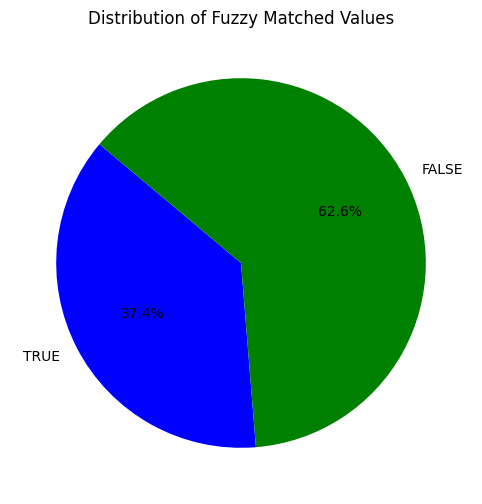

In [7]:
import matplotlib.pyplot as plt

# Count the number of TRUE and FALSE values in the 'fuzzy_matched' column
fuzzy_match_counts = bank_fuzzy_matches['fuzzy_matched'].value_counts()

# Define the labels and sizes for the pie chart
labels = ['TRUE', 'FALSE']
sizes = [fuzzy_match_counts['TRUE'], fuzzy_match_counts['FALSE']]
colors = ['blue', 'green']

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Fuzzy Matched Values')
plt.show()


# CASHBOOK MATCHING


In [8]:

# List of potential transaction ID columns
transaction_id_cols = ['ft_no', 'tt_no', 'aaa_no', 'md_no', 'charge_id', 'batch_no', 'cheque_no']

# Store matched results
matches = []

# Iterate over each potential transaction ID column
for col in transaction_id_cols:
    # Create a new column 'transaction_id' in bank DataFrame using the current column
    bank_df_ncba = bank_df_ncba.copy()  # Create a copy of the DataFrame to avoid modifying a view
    bank_df_ncba.loc[:, 'transaction_id'] = bank_df_ncba[col]
    
    # Perform fuzzy matching using fuzzymatcher
    matched_results = fuzzymatcher.fuzzy_left_join(
        cash_book,
        bank_df_ncba,
        right_on=["date", "amount", "transaction_id"],
        left_on=["posting_date", "amount", "eft_file_name"],
        right_id_col="index_bank",
        left_id_col="index_cashbook"
    )
    
    # Store the results with the column name used
    if not matched_results.empty:
        matched_results.loc[:, 'matched_using'] = col  # Create 'matched_using' column
        matches.append(matched_results)

# Combine all the matches found
all_matches_cashbook = pd.concat(matches, ignore_index=True)

# Display the combined matches
all_matches_cashbook


,best_match_score,__id_left,__id_right,index_cashbook,posting_date,document_type,document_no,bank_account_no,description,amount_left,...,aaa_no,md_no,charge_id,batch_no,inhouse_cheque_no,cheque_no,bulk_trans_id,is_charge,transaction_id,matched_using
0,-0.287141,0,76,0,2023-11-01,NaN,FPV-INS2023005697,2-740-02-002,KDN530F DENIS ODOYO,-1500000.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,ft_no
1,-0.049560,1,135,1,2023-11-01,NaN,2023020025786,2-740-02-002,NIC HEAD OFFICE,-45000.00,...,NaN,NaN,NaN,NaN,NaN,367.0,NaN,False,FT233055JJPL,ft_no
2,-0.330002,2,53,2,2023-11-01,NaN,2023020025493,2-740-02-002,NIC HEAD OFFICE,-59182.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,FT23304LJ8J5,ft_no
3,-0.319967,3,75,3,2023-11-01,NaN,2023020025294,2-740-02-002,NIC HEAD OFFICE,-817909.94,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,FT23305BZW6H,ft_no
4,-0.480226,4,7,4,2023-11-01,NaN,2023020025720,2-740-02-002,NIC HEAD OFFICE,-730680.88,...,AAACT23304RQC8Q4HY,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,ft_no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146204,0.178632,20882,3049,20882,2023-11-30,NaN,FR-INS2023001512,2-740-02-002,DA AMOUNTS IN AC 19 ( FT233331T30Y ETC),4040520.71,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,cheque_no
146205,-0.109541,20883,2461,20883,2023-11-30,NaN,FR-INS2023001513,2-740-02-002,NOVEMBER INTERFUND TRANSFER,118000.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,cheque_no
146206,-0.035669,20884,2059,20884,2023-11-30,NaN,FR-INS2023001515,2-740-02-002,NOVEMBER INTERFUND TRANSFER,8518859.20,...,NaN,NaN,NaN,RTO151023095941,NaN,NaN,NaN,False,NaN,cheque_no
146207,-0.258371,20885,3023,20885,2023-11-30,NaN,FPV-INS2023006211,2-740-02-002,Nov 2023 sacco deductions,-4900964.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,cheque_no



right_on=["date", "amount", "trx_id"]
left_on=["posting_date", "amount", "eft_file_name"]
matched_results_cashbook = fuzzymatcher.fuzzy_left_join(cash_book, bank_df_ncba, left_on = left_on, right_on = right_on, left_id_col="index_cashbook", right_id_col="index_bank")

       


In [13]:
cols = ['best_match_score','index_bank','index_cashbook','transaction_id','eft_file_name','amount_left', 'amount_right','date','posting_date']
# Sort by best_match_score in descending order
matched_results_sorted_cashbook = all_matches_cashbook.sort_values(by='best_match_score', ascending=False)

all_matches_cashbook[cols].sort_values(by='best_match_score', ascending=False)

# Drop duplicates to keep only the best match for each id_backend and id_fsp
unique_matched_results_cashbook = matched_results_sorted_cashbook.drop_duplicates(subset=['index_cashbook'], keep='first')
unique_matched_results_cashbook[cols]


,best_match_score,index_bank,index_cashbook,transaction_id,eft_file_name,amount_left,amount_right,date,posting_date
20882,0.675735,3049,20882,FT23333FLGN5,FT23333FLGN5,4.040521e+06,4.040521e+06,2023-11-30,2023-11-30
8410,0.656768,616,8410,FT23311GYQN0,FT23311GYQN0,5.073116e+07,5.073116e+07,2023-11-07,2023-11-07
54122,0.566049,1900,12348,AAACT233215BGY9RTJ,AAACT233215BGY9RTJ,-2.930000e+08,-2.930000e+08,2023-11-17,2023-11-17
14906,0.564475,2491,14906,FT23331DSMYJ,FT23331DSMYJ,5.349000e+03,5.349000e+03,2023-11-27,2023-11-27
14905,0.564475,2490,14905,FT23331XZK1M,FT23331XZK1M,1.673600e+04,1.673600e+04,2023-11-27,2023-11-27
...,...,...,...,...,...,...,...,...,...
95906,-0.478488,1993,12358,NaN,FT23292QCHX8,9.890063e+05,2.072633e+05,2023-11-20,2023-11-19
95899,-0.493083,25,12351,NaN,RKI0OATCKK,-2.496200e+04,5.013000e+03,2023-11-01,2023-11-18
95902,-0.493083,25,12354,NaN,RKI9OKPCSF,-3.715700e+04,5.013000e+03,2023-11-01,2023-11-18
95904,-0.505349,25,12356,NaN,RKJ5QJ5OVZ,-7.502400e+04,5.013000e+03,2023-11-01,2023-11-19


In [20]:
threshold = 0.3

# Initialize the 'fuzzy_matched' column to 'FALSE' for all rows
unique_matched_results_cashbook['fuzzy_matched'] = 'FALSE'

# Set 'fuzzy_matched' to 'TRUE' for rows with a match score above the threshold
unique_matched_results_cashbook.loc[unique_matched_results_cashbook['best_match_score'] >= threshold, 'fuzzy_matched'] = 'TRUE'

# Sort the results by 'best_match_score' in descending order
cashbook_fuzzy_matches = unique_matched_results_cashbook.sort_values(by=['best_match_score'], ascending=False)

# Define the columns to display, including the new 'fuzzy_matched' column
cols.append('fuzzy_matched')

# Display the DataFrame with the specified columns
cashbook_fuzzy_matches[cols]


/tmp/ipykernel_71481/3481169693.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_matched_results_cashbook['fuzzy_matched'] = 'FALSE'


,best_match_score,index_bank,index_cashbook,transaction_id,eft_file_name,amount_left,amount_right,date,posting_date,fuzzy_matched,fuzzy_matched,fuzzy_matched,fuzzy_matched
20882,0.675735,3049,20882,FT23333FLGN5,FT23333FLGN5,4.040521e+06,4.040521e+06,2023-11-30,2023-11-30,TRUE,TRUE,TRUE,TRUE
8410,0.656768,616,8410,FT23311GYQN0,FT23311GYQN0,5.073116e+07,5.073116e+07,2023-11-07,2023-11-07,TRUE,TRUE,TRUE,TRUE
54122,0.566049,1900,12348,AAACT233215BGY9RTJ,AAACT233215BGY9RTJ,-2.930000e+08,-2.930000e+08,2023-11-17,2023-11-17,TRUE,TRUE,TRUE,TRUE
14892,0.564475,2567,14892,FT23331Q25LJ,FT23331Q25LJ,1.068300e+04,1.068300e+04,2023-11-27,2023-11-27,TRUE,TRUE,TRUE,TRUE
14906,0.564475,2491,14906,FT23331DSMYJ,FT23331DSMYJ,5.349000e+03,5.349000e+03,2023-11-27,2023-11-27,TRUE,TRUE,TRUE,TRUE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95906,-0.478488,1993,12358,NaN,FT23292QCHX8,9.890063e+05,2.072633e+05,2023-11-20,2023-11-19,FALSE,FALSE,FALSE,FALSE
95899,-0.493083,25,12351,NaN,RKI0OATCKK,-2.496200e+04,5.013000e+03,2023-11-01,2023-11-18,FALSE,FALSE,FALSE,FALSE
95902,-0.493083,25,12354,NaN,RKI9OKPCSF,-3.715700e+04,5.013000e+03,2023-11-01,2023-11-18,FALSE,FALSE,FALSE,FALSE
95904,-0.505349,25,12356,NaN,RKJ5QJ5OVZ,-7.502400e+04,5.013000e+03,2023-11-01,2023-11-19,FALSE,FALSE,FALSE,FALSE


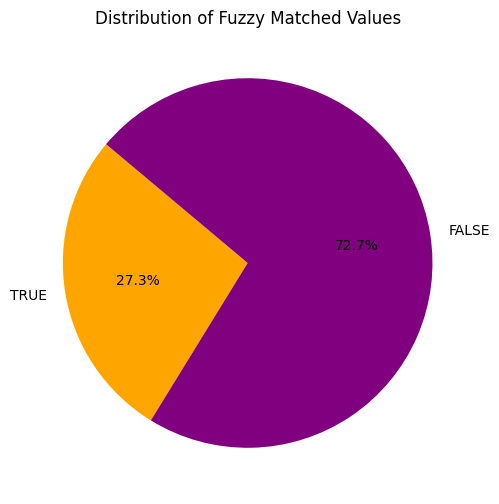

In [21]:
import matplotlib.pyplot as plt

# Count the number of TRUE and FALSE values in the 'fuzzy_matched' column
fuzzy_match_counts_cashbook = cashbook_fuzzy_matches['fuzzy_matched'].value_counts()

# Define the labels and sizes for the pie chart
labels = ['TRUE', 'FALSE']
sizes = [fuzzy_match_counts_cashbook['TRUE'], fuzzy_match_counts['FALSE']]
colors = ['orange', 'purple']

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Fuzzy Matched Values')
plt.show()
